In [16]:
import sys 
import os
import pandas as pd
from PIL import Image
import numpy as np

In [17]:
csv_path = '/data/AlgProj/tct_yaoms/data/tct_0513/detail_infomation.csv'
csv = pd.read_csv(csv_path)
csv.tail()

,序列编号,影像结果编号,x_min,y_min,x_max,y_max,z,恶性细胞分类
2300,06d40c98aa124d278eb9422b2bc0d3d8,332260,414,46,601,327,420,1
2301,06d40c98aa124d278eb9422b2bc0d3d8,332257,137,324,378,574,432,1
2302,06d40c98aa124d278eb9422b2bc0d3d8,332256,5,272,274,553,376,1
2303,06d40c98aa124d278eb9422b2bc0d3d8,332259,43,475,198,696,414,1
2304,06d40c98aa124d278eb9422b2bc0d3d8,332258,695,197,923,371,465,1


In [18]:
csv['恶性细胞分类'].value_counts()

1    1183
3     689
4     183
2     142
5      89
6      16
7       3
Name: 恶性细胞分类, dtype: int64

### 数据增广

In [39]:
aug_df = pd.DataFrame(columns=['img_path', 'label'])

In [37]:
def randomRotation(img_name, label,times,mode=Image.BICUBIC):
    img_id = img_name.split('_')[0]
    save_dir = '/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513_img_augmentation_0723/'
    data_dir = '/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513_crop_imgs/'
    img_path = data_dir + img_name
    try:
        ori_img = Image.open(img_path)
        global aug_df
#         if times == 1:
#             save_name = img_id + '_' + '.jpg'
#             save_path = save_dir + save_name
#             ori_img.save(save_path, quality=95)
#             aug_df = aug_df.append([{'img_path':save_path, 'label':label}])
#         else:
        for i in range(times):
            img = ori_img
            random_angle = np.random.randint(-50, 50)
            img = img.rotate(random_angle, mode)
            save_name = img_id + '_'+ str(i) + '.jpg'
            save_path = save_dir + save_name
            if not os.path.exists(save_path):
                img.save(save_path, quality=95)

            aug_df = aug_df.append([{'img_path':save_path, 'label':label}])
    except(OSError):
        print(img_id)
        print('-------------')

In [36]:
dataset = pd.read_csv('/data/AlgProj/tct_yaoms/data/tct_0513/dataset.csv')
dataset.tail()

,img_path,label
2300,/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513...,1
2301,/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513...,1
2302,/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513...,1
2303,/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513...,1
2304,/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513...,1


In [40]:

for idx in dataset.index:
    img_name = dataset.loc[idx, 'img_path'].split('/')[-1]
    label = dataset.loc[idx,'label']
    if label == 1:
        times = 1
    elif label == 2:
        times = 3
    elif label == 3:
        times = 1
    elif label == 4:
        times = 2
    elif label == 5:
        times = 5
    elif label == 6:
        times = 30
    elif label ==7:
        times = 100
    randomRotation(img_name, label,times,mode=Image.BICUBIC)

332535
-------------
332539
-------------


In [41]:
aug_df = aug_df.reset_index(drop= True)

In [42]:
len(aug_df)

3887

In [43]:
aug_df.to_csv('/data/AlgProj/tct_yaoms/data/tct_0513/augmentation_label_0723.csv', index=False)

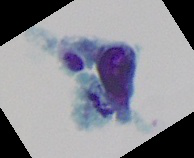

In [65]:
save_dir = '/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513_img_augmentation_0723/'
files = os.listdir(save_dir)

img = Image.open(save_dir+files[19])
img

In [66]:
aug_df.loc[1, 'img_path']

'/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513_img_augmentation_0723/180938_0.jpg'

In [67]:
aug_df.head()

,img_path,label
0,/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513...,1
1,/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513...,1
2,/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513...,1
3,/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513...,1
4,/data/AlgProj/tct_yaoms/data/tct_0513/tct_0513...,1


In [68]:
bg_df = pd.DataFrame(columns=[ 'label', 'img_path'])
bg_root = '/data/AlgProj/tct_yaoms/data/neg/'
sub_dirs = os.listdir(bg_root)
for sub_dir in sub_dirs:
    cur_dir = bg_root + sub_dir + '/'
    img_names = os.listdir(cur_dir)
    for img_name in img_names:
        img_path = cur_dir + img_name
        bg_df = bg_df.append([{ 'label':0, 'img_path':img_path}], ignore_index=True)


In [69]:
sample_df = bg_df.sample(n=1200, random_state=42, axis=0)

In [70]:
all_df = aug_df.append(sample_df, ignore_index=True)
len(all_df)

/home/yaoms/anaconda3/envs/PytorchEnv/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


5087

In [71]:
all_df.to_csv('/data/AlgProj/tct_yaoms/data/tct_0513/include_background_0723.csv', index=False)

In [72]:
all_df['label'].value_counts()

0    1200
1    1182
3     688
6     480
5     445
2     426
4     366
7     300
Name: label, dtype: int64

In [31]:
len(os.listdir(bg_root))

5539

In [33]:
j = np.random.randint(-30, 30)
print(j)

7


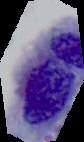

In [34]:
img.rotate(j)